# Setup
In this notebook you'll be plotting bar plots using MatPlotLib and Seaborn.

Import necessary libraries and download the "spscientist/students-performance-in-exams" dataset from kaggle and read it to a Pandas DataFrame.

In [129]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import subprocess

In [130]:
! kaggle datasets download spscientist/students-performance-in-exams
! unzip -o students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [131]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Bar Plots

(TASK 1): Using seaborn, make a countplot graphing the count of each ethnicity

Text(0.5, 1.0, 'Count of Each Race/Ethnicity')

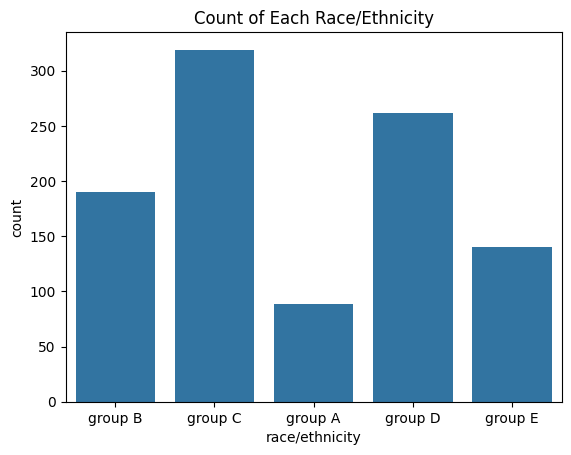

In [132]:
#sns.countplot(students['race/ethnicity'])
sns.countplot(data=df,x='race/ethnicity')
plt.title("Count of Each Race/Ethnicity")

(TASK 2):
Next, try doing the same thing with the matplotlib. 

To get the counts of each race/ethnicity in a bar plot using the matplotlib method, we need to manually get the counts of each group. Try it yourself using a groupby. Make sure that you label the axes!

  race/ethnicity  counts
0        group A      89
1        group B     190
2        group C     319
3        group D     262
4        group E     140


Text(0.5, 1.0, 'title')

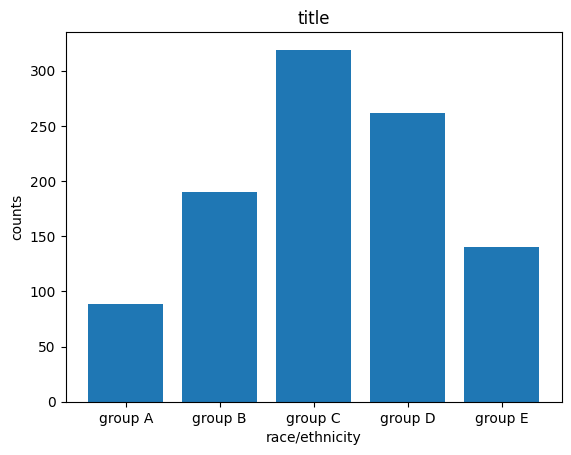

In [133]:
counts = df.groupby("race/ethnicity").count()
b = counts["gender"].reset_index().rename(columns={"gender": "counts"})
print(b)
plt.bar(b["race/ethnicity"],b["counts"])
plt.xlabel("race/ethnicity")
plt.ylabel("counts")
plt.title("title")

The method you use to create a visualization is up to preference, although in more advanced data you may have a preference for one method over another. Keep both in mind because both are useful!

(TASK 3): Create a bar plot for the parental level of education (remember to label your axes and title).

  parental level of education  counts
0          associate's degree     222
1           bachelor's degree     118
2                 high school     196
3             master's degree      59
4                some college     226
5            some high school     179


<BarContainer object of 6 artists>

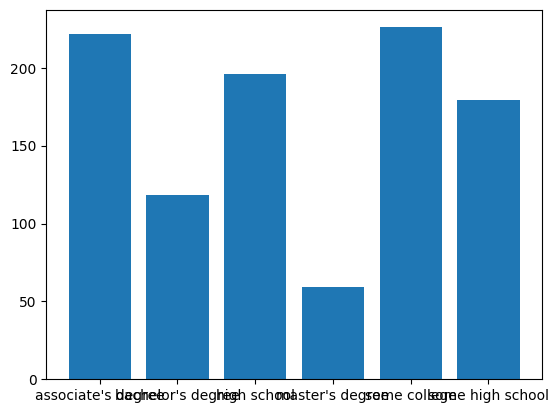

In [134]:
ed = df.groupby('parental level of education').count()
ed
ed = ed["gender"].reset_index().rename(columns={"gender": "counts"})
print(ed)
plt.bar(ed["parental level of education"],ed['counts'])


# Histograms/Density Curves/KDEs

(TASK 4): Now plot the distribution of math scores in a histogram using seaborn with a density curve laid on top of the histogram. You can use the histplot method for this.

<Axes: xlabel='math score', ylabel='Count'>

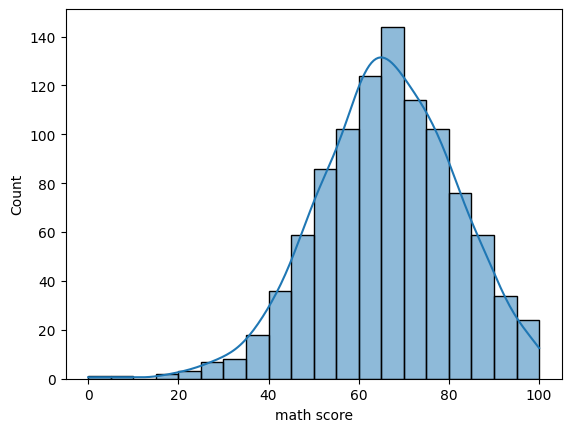

In [135]:
sns.histplot(data=df,x="math score", kde=True, bins=20)

(TASK 5): Now using matplotlib. Plotting a density curve is a more difficult process here, so we'll skip doing it for now. The axes and title labels need to be added.

Text(0, 0.5, 'count')

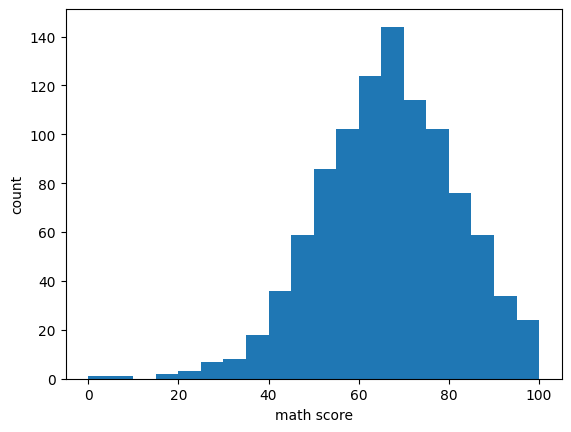

In [137]:
#plt.hist(x = df['math score'], bins = 20)
plt.hist(data=df, x='math score', bins = 20)
plt.xlabel('math score')
plt.ylabel('count')

(TASK 6): We'll take some time to understand the skew, outliers, and mode of this histogram. What are the properties of this histogram?

**This histogram is unimodal with one peak near math score of 65. There seems to be possible outliers on the left side, specifically the points between math score of 0-10. The histogram is very slightly skewed left, almost nearly normal.**

Although we could visualize the quartiles within the histogram itself using colors and a legend, it comes out to a somewhat complicated process. If we don't have to include that aspect of visualization, we can do something similar in a box plot (covered later in the notebook)!

(TASK 7): We saw the density curve in the seaborn plot, try plotting just the density curve without the histogram.

<Axes: xlabel='math score', ylabel='Density'>

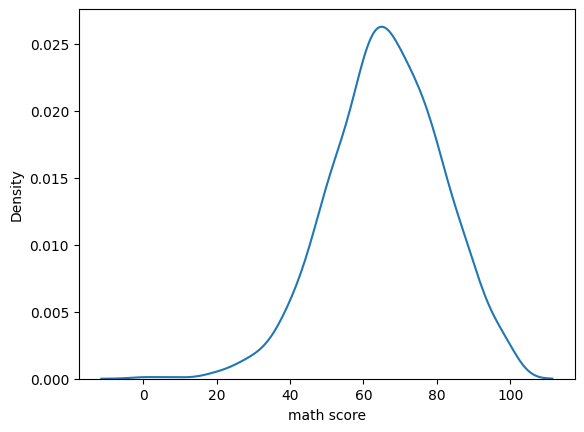

In [84]:
sns.kdeplot(data=df,x="math score")

# Box Plots/Violin Plots

(TASK 8): Make a box plot of the math scores using matplotlib and seaborn. No need for a title on this plot.

{'whiskers': [<matplotlib.lines.Line2D at 0x15c789590>,
 'caps': [<matplotlib.lines.Line2D at 0x15c789810>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c789450>],
 'medians': [<matplotlib.lines.Line2D at 0x15c789a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c789bd0>],
 'means': []}

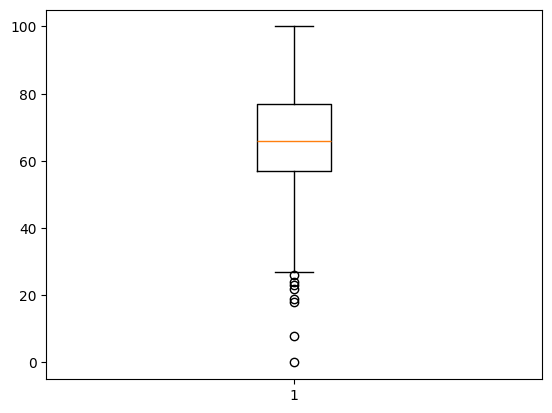

In [138]:
plt.boxplot(data = df, x="math score")
#sns.boxplot(data = df, x= 'math score')

(TASK 9): Let's take a second to discuss the properties of the boxplot (median, quartiles, outliers)

**The median score is around 65. The lower quartile is ~55 and the upper quartile is ~77. We can see several outliers from 0 - 25. Those points are all considered outliers.**

What about violin plots? Both are useful depending on what you want to accomplish - violin plots better show the distribution of points in an area, while box plots are better at showing outliers as individual points.

(TASK 10): Use seaborn to make a violin plot

<Axes: xlabel='math score'>

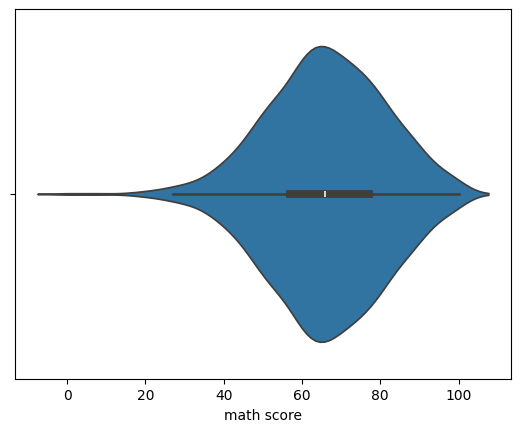

In [94]:
sns.violinplot(data = df, x='math score')

# Scatter Plots

If you want to see if there is some type of trend between two variables, scatter plots are really useful for visualizing it. Let's see if there's a trend between math score and reading score with parental level of education as the hue.

(TASK 11): Make a scatter plot with the x axis corresponding to the math score of each student and the y axis corresponding to the reading score. Plot this scatter plot and make sure that parental level of education is somehow represented.

In [124]:
#plt.scatter(data= df, x='math score', y = 'reading score')

<Axes: xlabel='math score', ylabel='reading score'>

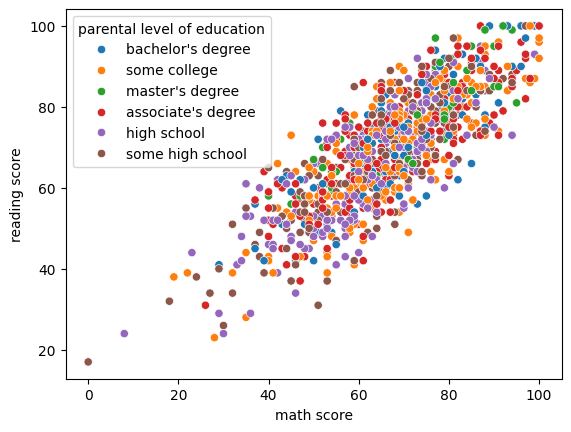

In [125]:
sns.scatterplot(data = df, x='math score', y = 'reading score',hue='parental level of education')

It's somewhat difficult to understand exactly what's happening in this plot - this is called overfitting. To account for this, either increase the size of the graph or jitter your plot! We won't be doing this here, but keep it in mind when you need to visualize data cleanly.

What about a trend between reading score and writing score? (matplotlib does not have an option for an automatic hue)

(TASK 12): Make a scatter plot of reading and writing score like task 11 without accounting for parental education. Fit a line of best fit so we can visualize the general trend of the data on top of the scatter plot.

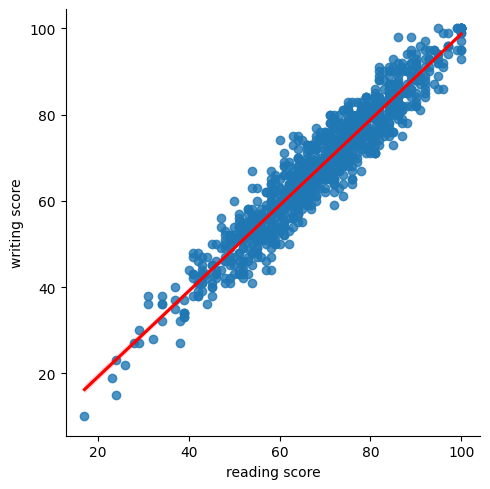

In [126]:
sns.lmplot(data=df,x='reading score',y='writing score',line_kws={"color":"red"})

(TASK 13): What can you compare about these two scatter plots? What information do each of these give us?

**In the first scatter plot, we can learn the math and reading scores of students categorized by their parental level of education. This brings focus on the effects of students academic performance based on their parents. In the second scatterplot, we focus more on if the student's writing and reading score are linear. This gives us information on the performance relationship between reading and writing and if one has an association to the other.**

# Transformations

### We're going to first make a new column so that there is a non-linear relationship
(TASK 14): Make a new column called "reading cubed" which is each student's reading score cubed. Plot this column instead of the regular reading score against each student's math score.

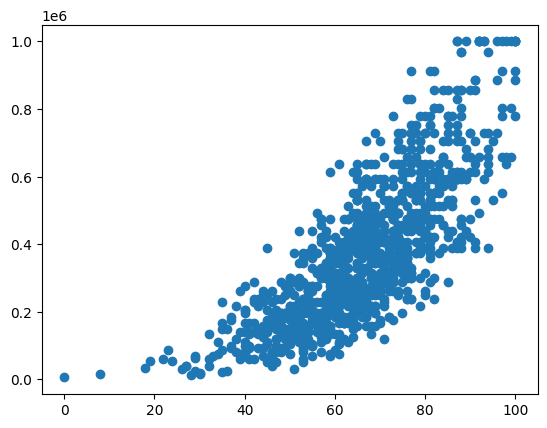

In [127]:
df['reading cubed'] = (df['reading score'].values)**3 
plt.scatter(data = df, x = 'math score', y = 'reading cubed')

(TASK 15): As you can see from the scatterplot, the relationship no longer looks linear. What change could we make to the math score to make a linear relationship (reference the Bulge Diagram in the slides if needed)

Create a new column that transforms the math scores so that the new column plotted against reading cubed shows a linear relationship.

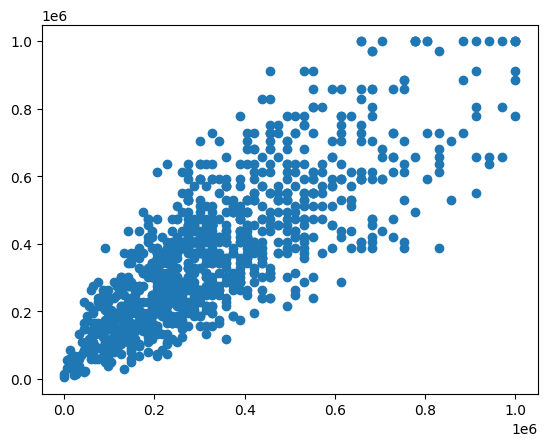

In [128]:
df['math cubed'] = (df['math score'].values)**3 
plt.scatter(data = df, x = 'math cubed', y = 'reading cubed')